In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import gc

In [2]:
# print(os.getcwd())

In [6]:
os.getcwd()

'C:\\Users\\saira\\Downloads'

CITIBIKE 

YoY Growth in numbers for all years

Acquired by Lyft on September 30, 2018, when the company was acquired by Lyft

2014 First Year of Operation 
2020,2021 --> Covid
2022--> 2023 --> Coming out of Covid
2023 Last Complete Year of Data 
2024 Current Year 

BayWheels : 

SF Based look at specifically tripduration hypothesis is that it should be longer than Citibike due to the fact that
SF has hilly roads 
Distribution of Ebikes vs Normal Bikes 

2017 --> First Year of Operation
2019 --> Lyft acquired Baywheels
2020,2021 --> COVID 
2024 --> Current Year 

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [2]:
def get_combined_yearly_data(base_path):
    column_mapping = {
        'Trip Duration': 'trip_duration',
        'Start Time': 'starttime',
        'Stop Time': 'stoptime',
        'Start Station ID': 'start station id',
        'Start Station Name': 'start station name',
        'Start Station Latitude': 'start station latitude',
        'Start Station Longitude': 'start station longitude',
        'End Station ID': 'end station id',
        'End Station Name': 'end station name',
        'End Station Latitude': 'end station latitude',
        'End Station Longitude': 'end station longitude',
        'Bike ID': 'bikeid',
        'User Type': 'usertype',
        'Birth Year': 'birth year',
        'Gender': 'gender'
    }

    if not os.path.exists(base_path):
        print(f"Error: The base path '{base_path}' does not exist.")
        return {}

    yearly_data = {}

    for year_folder in os.listdir(base_path):
        year_path = os.path.join(base_path, year_folder)
        
        if os.path.isdir(year_path):
            year_dataframes = []
            
            for month_folder in os.listdir(year_path):
                month_path = os.path.join(year_path, month_folder)
                
                if os.path.isdir(month_path):
                    for file in os.listdir(month_path):
                        if file.endswith(".csv"):
                            file_path = os.path.join(month_path, file)
                            try:
                                df = pd.read_csv(file_path, engine = 'python', low_memory=False)
                                df.rename(columns=column_mapping, inplace=True)
                                year_dataframes.append(df)
                            except Exception as e:
                                print(f"Error reading {file_path}: {e}")
            
            if year_dataframes:
                yearly_data[year_folder] = pd.concat(year_dataframes, ignore_index=True)
    
    return yearly_data

In [6]:
# base_path = r"Downloads\CitiBike"
# combined_data = get_combined_yearly_data(base_path)

In [3]:
def get_excel_files_from_monthly_folders(base_path):
    
    column_mapping = {'Trip Duration': 'tripduration',
    'Start Time': 'starttime',
    'Stop Time': 'stoptime',
    'Start Station ID': 'start station id',
    'Start Station Name': 'start station name',
    'Start Station Latitude': 'start station latitude',
    'Start Station Longitude': 'start station longitude',
    'End Station ID': 'end station id',
    'End Station Name': 'end station name',
    'End Station Latitude': 'end station latitude',
    'End Station Longitude': 'end station longitude',
    'Bike ID': 'bikeid',
    'User Type': 'usertype',
    'Birth Year': 'birth year',
    'Gender': 'gender'}

    if not os.path.exists(base_path):
        print(f"Error: The base path '{base_path}' does not exist.")
        return []

    all_dataframes = []
    
    for month_folder in os.listdir(base_path):
        month_path = os.path.join(base_path, month_folder)
        
        if os.path.isdir(month_path):
            for file in os.listdir(month_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(month_path, file)                  
                    try:
                        df = pd.read_csv(file_path)
                        all_dataframes.append(df)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
    
    return all_dataframes

In [4]:
# Drop stoptime,id,name,birth year etc.
# Add Birth year do 

def combine_dataframes_pre2022(dataframes):
    combined_df = pd.concat(dataframes, ignore_index = True)
    combined_df[['tripduration','starttime','gender','birth year','usertype','bikeid']]
    return combined_df

def combine_dataframes_post2022(dataframes):
    combined_df = pd.concat(dataframes, ignore_index = True)
    combined_df[['member_casual','rideable_type','started_at','ended_at']]
    return combined_df


def save_combined_dataframe(df, output_path):
    try:
        df.to_excel(output_path, index=False)
        print(f"Combined Excel file saved to: {output_path}")
    except Exception as e:
        print(f"Error saving combined Excel file: {e}")

In [8]:
# Initially explored 2013 data but later decided to not include it in the analysis as it only has 7 months of operation i.e. 
# from June to December

# df_final_2013['starttime'].dt.month.unique()

# base_path = r"Downloads\CitiBike\2013-citibike-tripdata\2013-citibike-tripdata"  
# excel_files = get_excel_files_from_monthly_folders(base_path)
# df_final_2013 = combine_dataframes(excel_files)

Some snippets from 2013 i.e. When Citibike was launched in New York

Number of Rides Completed : 5 Million+ Rides (56,14,888)

Average Ride Duration : 15.6 minutes

Subscribers 4.7 Million and Customer : 90,000+ 

gender
0     907911
1    3598883
2    1108094

Customer     26.60
Subscriber   13.51

In [237]:
user_growth_data = {
    'Year': [],
    'Customer': [],
    'Subscriber': [],
    'Total Users':[],
    'Male_riders':[],
    'Female_riders':[]
}

def update_data_user(year, counts,gender = None):
    user_growth_data['Year'].append(year)
        
    customer_count = counts.loc[counts['cust_type'] == 'Customer', 'Count']
    subscriber_count = counts.loc[counts['cust_type'] == 'Subscriber', 'Count']
    
    male_count = 0
    female_count = 0

    if gender is not None:
        gender['gender'] = gender['gender'].replace({1: 'male', 2: 'female'})
        gender = gender[gender['gender'] != 0]

        male_count = gender.loc[gender['gender'] == 'male', 'count']
        female_count = gender.loc[gender['gender'] == 'female', 'count']
    
    user_growth_data['Male_riders'].append(male_count.values[0] if gender is not None else 0)
    user_growth_data['Female_riders'].append(female_count.values[0] if gender is not None else 0)

    user_growth_data['Customer'].append(customer_count.values[0] if not customer_count.empty else 0)
    user_growth_data['Subscriber'].append(subscriber_count.values[0] if not subscriber_count.empty else 0)
    user_growth_data['Total Users'].append(customer_count.values[0] + subscriber_count.values[0] if not customer_count.empty else 0)

In [251]:
# cnt_2022[cnt_2022['cust_type']]=='member'

NameError: name 'df_final_2022' is not defined

In [ ]:
bike_data = {
    'Year': [],
    'Number of Bikes': [],
    'Average number of rides per bike': [],
    'Electric_rides_percentage':[]
}

def update_data_user(year, counts):
    data['Year'].append(year)
    customer_count = counts.loc[counts['cust_type'] == 'Customer', 'Count']
    subscriber_count = counts.loc[counts['cust_type'] == 'Subscriber', 'Count']
    user_growth_data['Customer'].append(customer_count.values[0] if not customer_count.empty else 0)
    user_growth_data['Subscriber'].append(subscriber_count.values[0] if not subscriber_count.empty else 0)
    user_growth_data['Total Users'].append(customer_count.values[0] + subscriber_count.values[0] if not customer_count.empty else 0)

In [ ]:
ride_data = {
    'Year': [],
    'Average_Ride_Duration': [],
    'Subscriber_Average': [],
    'Customer_Average':[],
    'Number_of_rides_over_45_minutes':[],
    'Longest_ride':[]
}

def update_data_ride(year, counts):
    data['Year'].append(year)
    customer_count = counts.loc[counts['cust_type'] == 'Customer', 'Count']
    subscriber_count = counts.loc[counts['cust_type'] == 'Subscriber', 'Count']
    user_growth_data['Customer'].append(customer_count.values[0] if not customer_count.empty else 0)
    user_growth_data['Subscriber'].append(subscriber_count.values[0] if not subscriber_count.empty else 0)
    user_growth_data['Total Users'].append(customer_count.values[0] + subscriber_count.values[0] if not customer_count.empty else 0)

In [58]:
cnt_2014 = df_final_2014['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})
gndr_2014 = df_final_2014['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
update_data_user(2014, cnt_2014,gndr_2014)

In [60]:
cnt_2015 = df_final_2015['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})
gndr_2015 = df_final_2015['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
update_data_user(2015, cnt_2015,gndr_2015)

In [61]:
cnt_2016 = df_final_2016['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})
gndr_2016 = df_final_2016['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
update_data_user(2016, cnt_2016,gndr_2016)

In [62]:
cnt_2017 = df_final_2017['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})
gndr_2017 = df_final_2017['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
update_data_user(2017, cnt_2017,gndr_2017)

In [63]:
cnt_2018 = df_final_2018['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})
gndr_2018 = df_final_2018['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
update_data_user(2018, cnt_2018,gndr_2018)

In [64]:
cnt_2019 = df_final_2019['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})
gndr_2019 = df_final_2019['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
update_data_user(2019, cnt_2019,gndr_2019)

In [65]:
cnt_2020 = df_final_2020['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})
gndr_2020 = df_final_2020['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
update_data_user(2020, cnt_2020,gndr_2020)

In [215]:
# cnt_2021 = df_final_2021['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})
# gndr_2021 = df_final_2021['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
update_data_user(2021, cnt_2021,gndr_2021)

In [216]:
# cnt_2022 = df_final_2022['member_casual'].value_counts().reset_index().rename(columns={'index':'cust_type','member_casual':'Count'})
# cnt_2022.loc[cnt_2022['cust_type']=='member','cust_type'] = 'Subscriber'
# cnt_2022.loc[cnt_2022['cust_type']=='casual','cust_type'] = 'Customer'
update_data_user(2022, cnt_2022)

In [232]:
cnt_2023 = df_final_2023['member_casual'].value_counts().reset_index().rename(columns={'index':'cust_type','member_casual':'Count'})
cnt_2023.loc[cnt_2023['cust_type']=='member','cust_type'] = 'Subscriber'
cnt_2023.loc[cnt_2023['cust_type']=='casual','cust_type'] = 'Customer'

In [233]:
cnt_2024 = df_final_2024['member_casual'].value_counts().reset_index().rename(columns={'index':'cust_type','member_casual':'Count'})
cnt_2024.loc[cnt_2024['cust_type']=='member','cust_type'] = 'Subscriber'
cnt_2024.loc[cnt_2024['cust_type']=='casual','cust_type'] = 'Customer'

In [238]:
update_data_user(2023, cnt_2023)
update_data_user(2024, cnt_2024)

In [181]:
# update_data_user(2021, cnt_2021,gndr_2021)
# user_growth_df.append(user_growth_data,ignore_index=True)
# cnt_2022

,cust_type,Count
0,Subscriber,23995071
1,Customer,6694850


In [261]:
user_growth_df

,Year,Customer,Subscriber,Total Users,Male_riders,Female_riders
0,2015,1311331,8626638,9937969,6608929,2006962
1,2016,1236265,9026384,10262649,6769032,2186917
2,2017,1676712,12441957,14118669,9306602,3236735
3,2018,1933514,15614825,17548339,11971322,4092462
4,2019,2872176,17679521,20551697,14052393,4938996
5,2020,4551091,14955766,19506857,11798407,5551873
6,2021,150177,945169,1095346,714609,289850
7,2022,6694850,23995071,30689921,0,0
8,2023,6696867,29529733,36226600,0,0
9,2024,74656,273794,348450,0,0


In [240]:
user_growth_df2 = pd.DataFrame(user_growth_data)

In [241]:
user_growth_df = pd.concat([user_growth_df,user_growth_df2],ignore_index = True)

In [244]:
user_growth_df_chart = user_growth_df[user_growth_df['Year']!=2024]

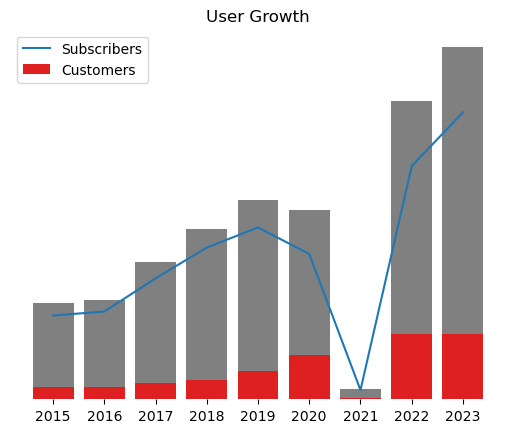

In [249]:
ax1 = sns.barplot(data = user_growth_df_chart, x = 'Year', y = 'Total Users', color = 'gray')
ax2 = sns.barplot(data = user_growth_df_chart, x = 'Year', y = 'Customer', color = 'red', label = 'Customers')

sns.despine(bottom = True, left = True)

plt.ticklabel_format(style='plain', axis='y')

# for index, row in user_growth_df.iterrows():
#     plt.text(x=index, y=row['Customer'], s=f"{row['Customer']}", ha='center')

sns.lineplot(data = user_growth_df_chart['Subscriber'], label = 'Subscribers')
# ax.set_xticks([]) 
ax1.set_yticks([]) 
plt.title('User Growth')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [260]:
# user_growth_df.to_csv('my_data.csv', index=False)

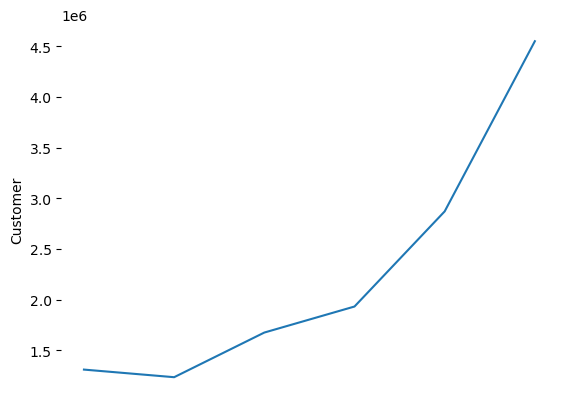

In [88]:
ax = sns.lineplot(data = user_growth_df['Customer'])
sns.despine(bottom = True, left = True)

# plt.ticklabel_format(style='plain', axis='y')

# for index, row in user_growth_df.iterrows():
#     plt.text(x=index, y=row['Customer'], s=f"{row['Customer']}", ha='center')

ax.set_xticks([]) 
# ax.set_yticks([]) 
# plt.title('User Growth')
# plt.xlabel('')
# plt.ylabel('')
plt.show()

In [ ]:
1) Growth in Rides & 2) Growth in Average Ride Duration

df_final_2014['tripduration'].agg(['count','mean'])

3) Growth in Customers, Subscribers

df_final_2014['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})

4) Growth in Average Ride Duration by usertype

df_final_2014.groupby('usertype')['tripduration'].mean().reset_index()

5) Growth in Number of Bikes 

df_final_2014['bikeid'].count()

6) Change in average number of rides per bike

df_final_2014['tripduration'].count()/df_final_2014['bikeid'].nunique()

7) Growth in number of rides averaging over 45 minutes

df_final_2014[df_final_2014['tripduration']/60>45]['tripduration'].count()

8) Change in Gender distribution

df_final_2014['gender'].value_counts()

9) Change in Monthly Number of Rides (See if the over the years if there is a pattern)

df_final_2024.groupby(df_final_2024['started_at'].dt.month)['tripduration'].count().reset_index().rename(columns={'tripduration':'Count'})

10) Longest Ride per year 

df_final_2014['tripduration'].max()/60

11) Electrification over the years (Growth rate) 2022 and onwards !

df_final_2024[df_final_2024['rideable_type'] == 'electric_bike']['rideable_type'].count()

In [271]:
# del df_final_2014
# del df_final_2015
# del df_final_2016
# del df_final_2017
# del df_final_2018
# del df_final_2021
del df_final_2022
del df_final_2023
del df_final_2024

gc.collect()

KeyboardInterrupt: 

In [ ]:
df_final_2022.head()

In [7]:
base_path = r"Downloads\CitiBike\2014-citibike-tripdata\2014-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2014 = combine_dataframes_pre2022(excel_files)

In [8]:
base_path = r"Downloads\CitiBike\2015-citibike-tripdata\2015-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2015 = combine_dataframes_pre2022(excel_files)

In [9]:
base_path = r"Downloads\CitiBike\2016-citibike-tripdata\2016-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2016 = combine_dataframes_pre2022(excel_files)

In [10]:
base_path = r"Downloads\CitiBike\2017-citibike-tripdata\2017-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2017 = combine_dataframes_pre2022(excel_files)

In [11]:
base_path = r"Downloads\CitiBike\2018-citibike-tripdata\2018-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2018 = combine_dataframes_pre2022(excel_files)

In [12]:
base_path = r"Downloads\CitiBike\2019-citibike-tripdata\2019-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2019 = combine_dataframes_pre2022(excel_files)

In [264]:
base_path = r"Downloads\CitiBike\2020-citibike-tripdata\2020-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2020 = combine_dataframes_pre2022(excel_files)

Error reading Downloads\CitiBike\2020-citibike-tripdata\2020-citibike-tripdata\8_August\202008-citibike-tripdata_2.csv: Unable to allocate 30.5 MiB for an array with shape (4, 1000000) and data type float64
Error reading Downloads\CitiBike\2020-citibike-tripdata\2020-citibike-tripdata\9_September\202009-citibike-tripdata_2.csv: Unable to allocate 15.3 MiB for an array with shape (2, 1000000) and data type object


KeyboardInterrupt: 

In [105]:
base_path = r"Downloads\CitiBike\2021-citibike-tripdata\2021-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2021 = combine_dataframes_post2022(excel_files)

C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [253]:
base_path = r"Downloads\CitiBike\2022-citibike-tripdata\2022-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2022 = combine_dataframes_post2022(excel_files)

C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [230]:
base_path = r"Downloads\CitiBike\2023-citibike-tripdata\2023-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2023 = combine_dataframes_post2022(excel_files)

C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saira\AppData\Local\Temp\ipykernel_22932\4131262467.py:33: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Use

In [231]:
base_path = r"Downloads\CitiBike\2024-citibike-tripdata\2024-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2024 = combine_dataframes_post2022(excel_files)

First Year of Operation 2014

In [ ]:
df_final = combine_dataframes(excel_files)

# save_path = r"Downloads\CitiBike\combined"

# out_1_csv = save_combined_dataframe(df_final,save_path)

In [ ]:
df_final

In [ ]:
df_final.dtypes

In [ ]:
df_final['starttime'] = pd.to_datetime(df_final['starttime'], errors='coerce')
df_final['stoptime'] = pd.to_datetime(df_final['stoptime'], errors='coerce')

In [ ]:
df_final['birth year'].isna().sum()

In [ ]:
df_final.replace('\\N', pd.NA, inplace=True)

In [ ]:
df_final['birth year'] = df_final['birth year'].fillna(0)

In [ ]:
df_final['birth year'] = df_final['birth year'].astype('int')

In [ ]:
df_final['tripduration'].agg(['min','max','std','mean'])

In [ ]:
# pd.cut(df_final['tripduration'], bins=10, include_lowest=True).value_counts().sort_index()

In [ ]:
import seaborn as sns

In [ ]:
df_final.head()

In [ ]:
# x2 = df_final['bikeid'].value_counts().reset_index().rename(columns={'index':'bikeid','bikeid':'count'})
# sns.countplot(data = x2, x = 'count')
# sns.despine(left = True, bottom = True)

In [ ]:
x2['count'].agg(['min','max','mean','std'])

In [ ]:
df_final.groupby('bikeid')['tripduration'].count()

In [ ]:
df_final.groupby('bikeid').agg({'tripduration':'count','starttime':'min','stoptime':'max'}).sort_values(by='tripduration',ascending = False)

In [ ]:
df_final['bikeid'].count()/df_final['bikeid'].nunique()

In [ ]:
df_final['bikeid'].nunique()

In [ ]:
df_final.groupby('usertype')['tripduration'].agg(['min','max','mean','count'])

In [ ]:
# df_final[df_final['tripduration']>df_final['tripduration'].mean()].groupby('usertype')['tripduration'].count()

In [ ]:
df_filtered = df_final[df_final['tripduration'] > df_final.groupby('usertype')['tripduration'].transform('mean')]
count_filt = df_filtered.groupby('usertype')['tripduration'].count()
count_total = df_final.groupby('usertype')['tripduration'].count()
count_filt/count_total * 100 # Percentage of users whose average trip duration is longer than the mean 

In [ ]:
count_filt_2 = df_final[df_final['start station name']==df_final['end station name']].groupby('usertype')['tripduration'].count()
count_filt_2/count_total * 100 # Percentage of users whose average trip duration is longer than the mean

In [ ]:
gender_cnt = df_final['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
# 0 = unknown 1 = male 2 = female

In [ ]:
gender_cnt

In [ ]:
df_final.groupby('gender')['usertype'].value_counts()

# Validates the hypothesis that people might be entering random values or leaving the field blank if they are not subscribers
# and just want the bike for a day or two.

In [ ]:
plt.pie(x = gender_cnt['count'],autopct='%1.1f%%')
new_labels = ['Male', 'Female', 'Unknown']
plt.legend(new_labels,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
df_final.groupby(['gender','usertype'])['tripduration'].count().reset_index().rename(columns={'tripduration':'Count'})

In [ ]:
df_final['start station name'].value_counts().sort_values(ascending = False)

In [ ]:
from collections import Counter

df_same_station = df_final[df_final['start station name'] == df_final['end station name']]
df_diff_station = df_final[df_final['start station name'] != df_final['end station name']]

pair_1 = list(zip(df_same_station['start station name'], df_same_station['end station name']))
pair_2 = list(zip(df_diff_station['start station name'], df_diff_station['end station name']))

pair_counts_same = Counter(pair_1)
pair_counts_same.most_common()

In [ ]:
# Count of pairs where start and end aren't the same 
pair_counts_diff = Counter(pair_2)
pair_counts_diff.most_common()

In [ ]:
count_filt_3 = df_final[df_final['start station name']==df_final['end station name']].groupby('usertype')['tripduration'].count()
count_filt_3

In [ ]:
count_filt_3/count_total * 100 # Percentage of users whose average trip duration is longer than the mean 

In [ ]:
count_filt_4 = df_final[df_final['start station name']!=df_final['end station name']].groupby('usertype')['tripduration'].count()
count_filt_4

In [ ]:
count_filt_4/count_total * 100 # Percentage of users whose average trip duration is longer than the mean 

In [ ]:
df_final[df_final['start station name']!=df_final['end station name']]['tripduration'].agg(['min','max','mean','std','count'])

In [ ]:
df_final[df_final['start station name']==df_final['end station name']]['tripduration'].agg(['min','max','mean','std','count'])

In [ ]:
import scipy.stats
scipy.stats.pearsonr(df_final['birth year'],df_final['tripduration'])

In [ ]:
scipy.stats.spearmanr(df_final['birth year'],df_final['tripduration'])

In [ ]:
scipy.stats.pearsonr(df_final.loc[df_final['birth year']!=0,'birth year'],df_final.loc[df_final['birth year']!=0,'tripduration'])

In [ ]:
scipy.stats.spearmanr(df_final.loc[df_final['birth year']!=0,'birth year'],df_final.loc[df_final['birth year']!=0,'tripduration'])

In [ ]:
# sns.regplot(data = df_final, x="birth year", y="tripduration")

In [ ]:
df_final.describe()

In [ ]:
df_final['tripduration'].value_counts()

In [ ]:
# df_final['trip']
sns.boxplot(data = df_age_group, x = 'count')

In [ ]:
df_age_group[df_age_group['count']>=100].index

In [ ]:
df_age_group[df_age_group['count']<=100].index

In [ ]:
df_age_group[df_age_group['count']<=100]

In [ ]:
df_final[(df_final['age']>90) & (df_final['birth year']!=0)]['tripduration'].mean()

In [ ]:
df_final[(df_final['age']>90) & (df_final['birth year']!=0)]['Month'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index')

In [ ]:
hr_count = df_final['starttime'].dt.hour.value_counts().reset_index().rename(columns = {'index':'Hour of Day','starttime':'Count'})

In [ ]:
sns.barplot(data = hr_count, x = 'Hour of Day', y = 'Count', color = 'gray')
sns.despine(left = True, bottom = True)
plt.show()

In [ ]:
df_3 = df_final[(df_final['birth year']!=0)&(df_final['age']!=0)].groupby(['age',df_final['starttime'].dt.hour])['tripduration'].count().reset_index()

In [ ]:
max_idx = df_3.groupby('age')['tripduration'].idxmax()

df_3.loc[max_idx]

In [ ]:
# Funny Data
df_final[df_final['age']==115]['tripduration'].max()/60
df_final[df_final['age']>=90]['tripduration'].mean()/60

In [ ]:
# One time users may be lying about their age 
df_final[df_final['age']>=90]['usertype'].value_counts()

In [ ]:
df_final[df_final['age']>=90].groupby('age')['usertype'].count()

In [ ]:
df_final[df_final['age']==115]

In [ ]:
# Check in 2024 Dataset and then go through the app. 

In [ ]:
max_idx_work_force = df_3[(df_3['age']>18) & (df_3['age']<=60)].groupby('age')['tripduration'].idxmax()

df_3.loc[max_idx_work_force]

In [ ]:
second_largest_per_group = df_3[(df_3['age']>18) & (df_3['age']<=60)].groupby('age').apply(lambda x: x.nlargest(2, 'tripduration').iloc[1])
second_largest_per_group

In [ ]:
# Trip duration during peak hours does it change a lot ?

df_final.groupby(df_final['starttime'].dt.hour)['tripduration'].agg(['max','mean'])

In [ ]:
df_final[(df_final['start station name'] == 'E 43 St & Vanderbilt Ave') & (df_final['end station name'] == 'W 41 St & 8 Ave')].groupby(df_final['starttime'].dt.hour)['tripduration'].agg(['mean','count'])

In [ ]:
df_final['starttime'].dt.month.value_counts().reset_index().rename(columns = {'index':'Month','starttime':'Number of Rides'}).sort_values(by = 'Month').plot.bar(x = 'Month',y = 'Number of Rides')
# df_final.groupby(df_final['starttime'].dt.month)['tripduration'].count().reset_index().rename(columns={'tripduration':'Number of Rides','starttime':'Month'}).plot.bar()

In [ ]:
df_final['tripduration'].count()

In [ ]:
df_final['tripduration'].isna().sum()

In [ ]:
df_final[df_final['tripduration']==60].count()

In [ ]:
df_final['tripduration'].plot.bar()

In [ ]:
df_final.isna().mean()

In [ ]:
df_final['usertype'].value_counts()

In [ ]:
df_final['age'] = 2014 - df_final['birth year']

In [ ]:
df_final['age'].value_counts()

In [ ]:
df_final_filt = df_final[df_final['birth year']!=0]

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = df_final_filt['tripduration'], y = df_final_filt['age'])
sns.despine(left = True, bottom = True)

In [ ]:
df_age_group = df_final_filt.groupby('age')['tripduration'].agg(['min','mean','max','count']).sort_values(by='count',ascending=False)

In [ ]:
df_age_group['count'][:5]

In [ ]:
df_age_group['count'].tail()

In [ ]:
sns.histplot(data = df_age_group,x = 'age', y = 'count')

In [ ]:
df_age_dist = df_final[(df_final['age']!=0) & (df_final['age']<=100)]
sns.displot(df_age_dist['age'],kind = 'kde')

In [ ]:
ax = sns.countplot(data = df_final_filt , x = 'age')
sns.despine(left = True, bottom = True)
ax.set(xlabel='')
ax.set(ylabel='')
ax.set_yticks([])
ax.set_xticks([])
# x_ticks_positions = range(0, len(df_final_filt), 2)
# x_ticks_labels = df_final_filt['age'].iloc[x_ticks_positions]
plt.title(label = 'Distribution of Numbers of Rides by Age')
plt.show()

In [ ]:
threshold = df_final_filt['age'].value_counts().quantile(0.90)
age_count = df_final_filt['age'].value_counts().reset_index().rename(columns={'age':'count','index':'age'})
top_10_percent_df = age_count[age_count['count'] >= threshold]
ax2 = sns.barplot(data = top_10_percent_df, x = 'age' , y = 'count',color = 'gray')
sns.despine(left = True,bottom = 'True')
ax2.set(ylabel='')
ax2.set_yticks([])
ax2.set(xlabel='')
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')
plt.show()

In [ ]:
# Beautify this 
age_ls = list(top_10_percent_df['age'])

for x in age_ls:
    df_age = df_final_filt[df_final_filt['age'] == x]
    df_grouped = df_age.groupby(['Month', 'age'])['tripduration'].mean().reset_index()    
    plt.plot(df_grouped['Month'], df_grouped['tripduration'],label = x)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Month and Age Group')

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])

sns.despine(left = True, bottom = True)
plt.show()

In [ ]:
# import dash
# from dash import dcc, html
# import plotly.graph_objs as go

# Make the above graph interactive 

In [ ]:
import seaborn as sns
corr = df_final_filt.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
# See how dataset changes overtime 
# Growth in number of rides over the years
# Seasonal Trends (If some months are trending ever year try to find the cause)

In [ ]:
cols_list = df_final.columns.to_list()
cols_list
# len(cols_list)

In [ ]:
df_final.isna().sum()/df_final.count()

In [ ]:
trip = df_final

In [ ]:
trip = trip[['bikeid', 'starttime', 'stoptime', 'start station id', 'end station id']]
trip = trip.dropna(subset=['end station id'])
trip['end station id'] = trip['end station id'].astype('int64')
trip = trip.sort_values(['bikeid', 'starttime', 'stoptime'])
trip.head()

In [ ]:
bike_transfer = trip
bike_transfer['flag'] = trip['start station id'] - trip['end station id'].shift(periods=1)
bike_transfer = bike_transfer.dropna(subset=['flag'])
bike_transfer['flag'] = (bike_transfer['flag'] > 0)
bike_transfer['flag'] = bike_transfer['flag'].astype(np.int64)

In [ ]:
bike_transfer['end station id'] = bike_transfer['end station id'].shift(periods=1)
bike_transfer['stoptime'] = bike_transfer['stoptime'].shift(periods=1)
bike_transfer = bike_transfer.dropna(subset=['end station id'])
bike_transfer['end station id'] = bike_transfer['end station id'].astype(np.int64)
bike_transfer = bike_transfer[bike_transfer['flag'] > 0]

In [ ]:
arrivals = bike_transfer[['start station id', 'starttime', 'flag']]
arrivals = arrivals.rename(columns={"start station id":"station id", "starttime":"time", "flag":"counts"})

departures = bike_transfer[['end station id', 'stoptime', 'flag']]
departures['flag'] = -departures['flag']
departures = departures.rename(columns={"end station id":"station id", "stoptime":"time", "flag":"counts"})

df_total = arrivals.append(departures)
df_total.head()

In [ ]:
df_total = df_total.sort_values(['station id', 'time'])
df_total['counts'] = df_total.groupby('station id')['counts'].cumsum()
df_total = df_total.rename(columns={"counts":"aerometafores"})
df_total

In [ ]:
base_path = r"Downloads\CitiBike\2013-citibike-tripdata\2013-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)

In [ ]:
df_final_2013 = combine_dataframes(excel_files)

In [ ]:
df_final_2013 = combine_dataframes(excel_files)
df_final_2013.head()

In [ ]:
df_final_2013['starttime'] = pd.to_datetime(df_final_2013['starttime'], errors='coerce')
df_final_2013['stoptime'] = pd.to_datetime(df_final_2013['stoptime'], errors='coerce')
df_final_2013['birth year'].isna().sum()
df_final_2013.replace('\\N', pd.NA, inplace=True)

In [ ]:
df_final_2013['birth year'] = df_final_2013['birth year'].fillna(0)
df_final_2013['birth year'] = df_final_2013['birth year'].astype('int')

First Year of Operation

In [ ]:
df_final_2013.head()

In [ ]:
df_final_2013['tripduration'].agg(['min','max','std','mean'])

In [ ]:
weekend_ridership = df_final_2013[df_final_2013['starttime'].dt.weekday>=5]['tripduration'].agg(['mean','max','std','count'])

In [ ]:
weekday_ridership = df_final_2013[df_final_2013['starttime'].dt.weekday<5]['tripduration'].agg(['mean','max','std','count'])

In [ ]:
weekday_ridership - weekend_ridership

IMPACT OF COVID 

In [ ]:
base_path = r"Downloads\CitiBike\2020-citibike-tripdata\2020-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2020 = combine_dataframes(excel_files)

In [ ]:
base_path = r"Downloads\CitiBike\2019-citibike-tripdata\2019-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2019 = combine_dataframes(excel_files)

In [ ]:
df_final_2019['starttime'] = pd.to_datetime(df_final_2019['starttime'], errors='coerce')
df_final_2019['stoptime'] = pd.to_datetime(df_final_2019['stoptime'], errors='coerce')

In [ ]:
base_path = r"Downloads\CitiBike\2018-citibike-tripdata\2018-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2018 = combine_dataframes(excel_files)

In [ ]:
df_final_2018['starttime'] = pd.to_datetime(df_final_2018['starttime'], errors='coerce')
df_final_2018['stoptime'] = pd.to_datetime(df_final_2018['stoptime'], errors='coerce')

In [ ]:
base_path = r"Downloads\CitiBike\2022-citibike-tripdata\2022-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2022 = combine_dataframes(excel_files)

In [ ]:
df_final_2022['started_at'] = pd.to_datetime(df_final_2022['started_at'], errors='coerce')
df_final_2022['ended_at'] = pd.to_datetime(df_final_2022['ended_at'], errors='coerce')

In [ ]:
base_path = r"Downloads\CitiBike\2023-citibike-tripdata\2023-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)
df_final_2023 = combine_dataframes(excel_files)

In [ ]:
df_final_2023['started_at'] = pd.to_datetime(df_final_2023['started_at'], errors='coerce')
df_final_2023['ended_at'] = pd.to_datetime(df_final_2023['ended_at'], errors='coerce')

In [ ]:
df_final_2020['starttime'].dt.month.value_counts() - df_final_2019['starttime'].dt.month.value_counts()

In [ ]:
# df_final_2020[df_final_2020['starttime'].dt.month>=4]['starttime'].dt.hour.value_counts()/9 - df_final_2020[df_final_2020['starttime'].dt.month<4]['starttime'].dt.hour.value_counts()/3

In [ ]:
df_final_2020_timing = df_final_2020[df_final_2020['starttime'].dt.month<4].groupby(df_final_2020['starttime'].dt.hour)['tripduration'].count()/df_final_2020[df_final_2020['starttime'].dt.month<4]['tripduration'].count()*100

In [ ]:
df_final_2019_timing = df_final_2019[df_final_2019['starttime'].dt.month<4].groupby(df_final_2019['starttime'].dt.hour)['tripduration'].count()/df_final_2019[df_final_2019['starttime'].dt.month<4]['tripduration'].count()*100

In [ ]:
df_final_2019_timing[9:18].sum()

In [ ]:
df_final_2020_timing[9:18].sum()

In [ ]:
df_final_2019_timing[[8,9,16,17]].sum()

In [ ]:
df_final_2020_timing[[8,9,16,17]].sum()

In [ ]:
df_final_2020[df_final_2020['starttime'].dt.month<4].groupby(df_final_2020['starttime'].dt.hour)['tripduration'].count()

In [ ]:
df_final_2020.groupby([df_final_2020['starttime'].dt.month,'usertype'])['tripduration'].count() - df_final_2019.groupby([df_final_2019['starttime'].dt.month,'usertype'])['tripduration'].count()

In [ ]:
df_final_2020.groupby('usertype')['tripduration'].count() - df_final_2019.groupby('usertype')['tripduration'].count()

In [ ]:
df_final_2020['starttime'].dt.month.value_counts() - df_final_2018['starttime'].dt.month.value_counts()

In [ ]:
df_final_2019['starttime'].dt.month.value_counts() - df_final_2018['starttime'].dt.month.value_counts()

In [ ]:
df_final_2020['tripduration'].count() - df_final_2019['tripduration'].count()

# The number of rides went down from 2019 to 2020.

In [ ]:
df_final_2019['tripduration'].count() - df_final_2018['tripduration'].count()

In [ ]:
df_final_2020['gender'].value_counts()

In [ ]:
df_final_2020['usertype'].value_counts()

In [ ]:
df_final_2020.dtypes

In [ ]:
df_final_2020['starttime'] = pd.to_datetime(df_final_2020['starttime'], errors='coerce')
df_final_2020['stoptime'] = pd.to_datetime(df_final_2020['stoptime'], errors='coerce')
# df_final_2020['birth year'].isna().sum()
# df_final_2020.replace('\\N', pd.NA, inplace=True)

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7731099/#:~:text=On%20March%2020%20Cuomo%20announced,has%20been%20considered%20as%20the

In [ ]:
df_2020_monthly = df_final_2020.groupby(df_final_2020['starttime'].dt.month)['tripduration'].count().reset_index().rename(columns = {'tripduration':'count'})

In [ ]:
df_2020_monthly
# Compare this with monthly trends in 2018,2019 
# Raw numbers comparison and percentage of total users comparison as well

In [ ]:
sns.barplot(data = df_2020_monthly, x = 'starttime', y = 'count',color = 'gray')
sns.despine(left = True, bottom = True)
plt.show()

In [ ]:
(2020 - df_final_2020['birth year']).value_counts()

In [ ]:
((2020 - df_final_2020['birth year'])>=90).sum()

In [ ]:
((2020 - df_final_2020['birth year'])>=100).sum()

In [ ]:
df_final_2020['age'] = 2020 - df_final_2020['birth year']

In [ ]:
df_final_2020[df_final_2020['age']>=100]['tripduration'].mean()/60

In [ ]:
df_final_2020[df_final_2020['age']>=90]['usertype'].value_counts()

In [ ]:
df_final_2020[df_final_2020['age']>=90]['birth year'].value_counts()

In [ ]:
df_final_2020[df_final_2020['age'] == df_final_2020['age'].max()]['birth year'].count() 
# 1873 

In [ ]:
df_final_2020[df_final_2020['age']>=90]

In [ ]:
df_final_2020['birth year'].value_counts()

In [ ]:
2012 - 1969

Current Year 

In [ ]:
base_path = r"Downloads\CitiBike\2024-citibike-tripdata\2024-citibike-tripdata"  
excel_files = get_excel_files_from_monthly_folders(base_path)

In [ ]:
df_final_2024

In [ ]:
df_final_2024 = combine_dataframes(excel_files)
df_final_2024['started_at'] = pd.to_datetime(df_final_2024['started_at'], errors='coerce')
df_final_2024['ended_at'] = pd.to_datetime(df_final_2024['ended_at'], errors='coerce')

In [ ]:
df_final_2024.head()

In [ ]:
df_final_2024['tripduration']

In [ ]:
bins_in_minutes = [0, 2700 / 60, df_final_2024['tripduration'].max() / 60]

pd.cut(df_final_2024['tripduration']/60 ,bins = bins_in_minutes).value_counts()

In [ ]:
105*60

In [ ]:
bins_in_minutes = [0,2700/60,3600/60,4500/60,df_final_2024['tripduration'].max() / 60]

pd.cut(df_final_2024['tripduration']/60 ,bins = bins_in_minutes).value_counts()

In [ ]:
df_final_2024[df_final_2024['tripduration']/60>=45]['tripduration'].agg(['min','max','mean'])/60

In [ ]:
bins_in_minutes = [2700/60,3600/60,4500/60,5400/60,6300/60,df_final_2024['tripduration'].max() / 60]
pd.cut(df_final_2024[df_final_2024['tripduration']/60>=45]['tripduration']/60,bins = bins_in_minutes).value_counts()

In [ ]:
bins_in_minutes = [2700 / 60, 3600 / 60, 4500 / 60, 5400 / 60, 6300 / 60, df_final_2024['tripduration'].max() / 60]

filtered_df = df_final_2024[df_final_2024['tripduration'] / 60 >= 45]
filtered_df['tripduration_binned'] = pd.cut(filtered_df['tripduration'] / 60, bins=bins_in_minutes)
last_bin = filtered_df['tripduration_binned'].cat.categories[-1]
last_bin_df = filtered_df[filtered_df['tripduration_binned'] == last_bin]

mean_tripduration_last_bin = last_bin_df['tripduration'].mean()/60

plt.figure(figsize=(8, 6))
plt.boxplot(last_bin_df['tripduration']/60, vert=False)
plt.title(f'Boxplot of Trip Durations for Bin: {last_bin}')
plt.xlabel('Trip Duration (Minutes)')
plt.axvline(mean_tripduration_last_bin, color='r', linestyle='--', linewidth=1)
plt.text(mean_tripduration_last_bin, 1.02, f'Mean: {mean_tripduration_last_bin:.2f} mins', color='r', ha='center')
plt.show()

In [ ]:
Q1 = last_bin_df['tripduration'].quantile(0.25)
Q3 = last_bin_df['tripduration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = last_bin_df[(last_bin_df['tripduration'] < lower_bound) | (last_bin_df['tripduration'] > upper_bound)]

outliers['tripduration'].count()

In [ ]:
outliers['rideable_type'].value_counts()

In [ ]:
outliers['member_casual'].value_counts()

In [ ]:
long_rides = df_final_2024[df_final_2024['tripduration']/60>45][['rideable_type','member_casual']].value_counts().reset_index()

In [ ]:
long_rides

In [ ]:
ax = sns.barplot(data = long_rides, x = 0, hue = 'member_casual' , y = 'rideable_type')
sns.despine(left = True, bottom = True)

ax.set(xlabel='')
ax.set(ylabel='')
ax.set_yticks([])
ax.set_xticks([])
plt.show()

In [ ]:
plt.pie(x = df_final_2024['rideable_type'].value_counts().values,labels = df_final_2024['rideable_type'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [ ]:
df_ride_type = df_final_2024.groupby('rideable_type')['tripduration'].agg(['mean','max']).reset_index()

In [ ]:
df_ride_type

In [ ]:
sns.barplot(data = df_ride_type, x = 'rideable_type', y = 'mean',color = 'gray')
sns.despine(left = True, bottom = True)
plt.show()

In [ ]:
electric_bike = df_final_2024[df_final_2024['rideable_type']=='electric_bike'][['start_station_name','end_station_name']]
bike = df_final_2024[df_final_2024['rideable_type']=='classic_bike'][['start_station_name','end_station_name']]

In [ ]:
pair_electric = list(zip(electric_bike['start_station_name'], electric_bike['end_station_name']))
pair_bike = list(zip(bike['start_station_name'], bike['end_station_name']))

In [ ]:
pair_counts_bike = Counter(pair_bike)
pair_counts_bike.most_common()

In [ ]:
pair_counts_electric_bike = Counter(pair_electric)
pair_counts_electric_bike.most_common()

In [ ]:
# don't remove the coordinates before calculating the distance 
# between the stations for the top 5 trips for both electric and normal bike rides

In [ ]:
# Plotting the bar graph
fig, ax = plt.subplots()

# Width of each bar
bar_width = 0.35

# Locations of the bars on the x-axis
index = range(len(df_ride_type))

# Plotting mean and max bars side by side
ax.bar(index, df_ride_type['mean'], bar_width, label='Mean')
ax.bar([p + bar_width for p in index], df_ride_type['max'], bar_width, label='Max')

# Adding labels and title
ax.set_xlabel('Rideable Type')
ax.set_ylabel('Trip Duration')
ax.set_title('Mean and Max Trip Duration by Rideable Type')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(df_ride_type['rideable_type'])
ax.legend()

plt.show()

In [ ]:
df_final_2024.drop(columns = ['start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng'],inplace = True)

In [ ]:
df_final_2024.drop(columns = ['ride_id'],inplace = True)

In [ ]:
df_final_2024['member_casual'].value_counts()

In [ ]:
df_final_2024['tripduration'] = (df_final_2024['ended_at']-df_final_2024['started_at']).dt.total_seconds()

In [ ]:
df_final_2024[df_final_2024['tripduration']<=60].count()

In [ ]:
df_final_2024['tripduration'].agg(['min','max','mean'])

Year of Year Growth 

1) Growth in Rides & 2) Growth in Average Ride Duration

df_final_2014['tripduration'].agg(['count','mean'])

3) Growth in Customers, Subscribers

df_final_2014['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})

4) Growth in Average Ride Duration by usertype

df_final_2014.groupby('usertype')['tripduration'].mean().reset_index()

5) Growth in Number of Bikes 

df_final_2014['bikeid'].count()

6) Change in average number of rides per bike

df_final_2014['tripduration'].count()/df_final_2014['bikeid'].nunique()

7) Growth in number of rides averaging over 45 minutes

df_final_2014[df_final_2014['tripduration']/60>45]['tripduration'].count()

8) Change in Gender distribution

df_final_2014['gender'].value_counts()

9) Change in Monthly Number of Rides (See if the over the years if there is a pattern)

df_final_2024.groupby(df_final_2024['started_at'].dt.month)['tripduration'].count().reset_index().rename(columns={'tripduration':'Count'})

10) Longest Ride per year 

df_final_2014['tripduration'].max()/60

11) Electrification over the years (Growth rate) 2022 and onwards !

df_final_2024[df_final_2024['rideable_type'] == 'electric_bike']['rideable_type'].count()

In [26]:
df_final_2013.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.69,-73.98,366.00,Clinton Ave & Myrtle Ave,40.69,-73.97,16052,Subscriber,1982,1
1,729,2013-10-01 00:01:21,2013-10-01 00:13:30,322,Clinton St & Tillary St,40.70,-73.99,398.00,Atlantic Ave & Furman St,40.69,-74.00,19412,Customer,\N,0
2,520,2013-10-01 00:01:24,2013-10-01 00:10:04,174,E 25 St & 1 Ave,40.74,-73.98,403.00,E 2 St & 2 Ave,40.73,-73.99,19645,Subscriber,1984,1
3,281,2013-10-01 00:01:25,2013-10-01 00:06:06,430,York St & Jay St,40.70,-73.99,323.00,Lawrence St & Willoughby St,40.69,-73.99,16992,Subscriber,1985,1
4,196,2013-10-01 00:01:27,2013-10-01 00:04:43,403,E 2 St & 2 Ave,40.73,-73.99,401.00,Allen St & Rivington St,40.72,-73.99,15690,Subscriber,1986,1


In [ ]:
cnt_2013 = df_final_2013['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})

In [ ]:
cnt_2014 = df_final['usertype'].value_counts().reset_index().rename(columns={'index':'cust_type','usertype':'Count'})

In [ ]:
trip_dur_2013 = df_final_2013['tripduration'].agg(['max','std','mean'])/60

In [ ]:
df_final_2013['tripduration'].agg(['max','std','mean'])/60

In [ ]:
df_final_2013[df_final_2013['tripduration']==df_final_2013['tripduration'].max()]

In [ ]:
df_final_2013[df_final_2013['tripduration']/3600>1].groupby('usertype')['tripduration'].count()

In [ ]:
df_final_2013[df_final_2013['tripduration']/3600>1].groupby('gender')['tripduration'].count()

In [ ]:
df_final_2013[df_final_2013['tripduration']/3600>1].head()

In [ ]:
trip_dur_2013

In [ ]:
df_final_2013[df_final_2013['tripduration']==df_final_2013['tripduration'].max()]['stoptime'] - df_final_2013[df_final_2013['tripduration']==df_final_2013['tripduration'].max()]['starttime']

In [ ]:
#converting trip duration from seconds to minuits
df_final_2013['tripduration'] = df_final_2013['tripduration']/60

#creating bins (0-30min, 30-60min, 60-120min, 120 and above)
max_limit = df_final_2013['tripduration'].max()
df_final_2013['tripduration_bins'] = pd.cut(df_final_2013['tripduration'], [0, 30, 60, 120, max_limit])

sns.barplot(x='tripduration_bins', y='tripduration', data=df_final_2013, estimator=np.size)
plt.title('Usual trip duration', fontsize=30)
plt.xlabel('Trip duration group', fontsize=20)
plt.ylabel('Trip Duration', fontsize=20)
plt.show()

In [ ]:
# In 2013 on an average a ride lasted 15 minutes and the longest ride was 1736.32 Hours or 72 Days

In [32]:
# Post 2022

df_final_2024['started_at'] = pd.to_datetime(df_final_2024['started_at'], errors='coerce')
df_final_2024['ended_at'] = pd.to_datetime(df_final_2024['ended_at'], errors='coerce')
df_final_2024['tripduration'] = df_final_2024['ended_at'] - df_final_2024['started_at']

In [ ]:
data = {
    'Year': [],
    'Customer': [],
    'Subscriber': [],
    'Total Users':[]
}

def update_data(year, counts):
    data['Year'].append(year)
    customer_count = counts.loc[counts['cust_type'] == 'Customer', 'Count']
    subscriber_count = counts.loc[counts['cust_type'] == 'Subscriber', 'Count']
    data['Customer'].append(customer_count.values[0] if not customer_count.empty else 0)
    data['Subscriber'].append(subscriber_count.values[0] if not subscriber_count.empty else 0)
    data['Total Users'].append(customer_count.values[0] + subscriber_count.values[0] if not customer_count.empty else 0)

In [ ]:
update_data(2013, cnt_2013)
update_data(2014, cnt_2014)

In [ ]:
df_cust_sub_count = pd.DataFrame(data)

In [ ]:
df_cust_sub_count